In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras import layers,models

In [2]:
epochs =50
channels =3
image_size = (256,256)
batch_size =32

# Load Dataset

In [4]:
data_potato = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle =True,
    image_size = (256,256),
    batch_size = 32
    )



Found 2152 files belonging to 3 classes.


In [5]:
len(data_potato)

68

In [6]:
32 *68

2176

In [7]:
class_names = data_potato.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch,label_batch in data_potato.take(1):
    # print(image_batch.shape())
    print(image_batch.numpy())
    print(label_batch.numpy())
    print(image_batch.shape)


[[[[206. 203. 210.]
   [203. 200. 207.]
   [198. 195. 202.]
   ...
   [177. 175. 186.]
   [178. 176. 187.]
   [180. 178. 189.]]

  [[200. 197. 204.]
   [198. 195. 202.]
   [196. 193. 200.]
   ...
   [179. 177. 188.]
   [178. 176. 187.]
   [176. 174. 185.]]

  [[196. 193. 200.]
   [194. 191. 198.]
   [194. 191. 198.]
   ...
   [179. 177. 188.]
   [176. 174. 185.]
   [172. 170. 181.]]

  ...

  [[151. 146. 153.]
   [144. 139. 146.]
   [144. 139. 146.]
   ...
   [139. 136. 147.]
   [142. 138. 152.]
   [157. 153. 167.]]

  [[148. 143. 150.]
   [143. 138. 145.]
   [148. 143. 150.]
   ...
   [147. 144. 155.]
   [147. 143. 157.]
   [152. 148. 162.]]

  [[147. 142. 149.]
   [144. 139. 146.]
   [150. 145. 152.]
   ...
   [143. 140. 151.]
   [139. 135. 149.]
   [136. 132. 146.]]]


 [[[125. 116. 119.]
   [131. 122. 125.]
   [132. 123. 126.]
   ...
   [148. 142. 146.]
   [150. 144. 148.]
   [149. 143. 147.]]

  [[146. 137. 140.]
   [148. 139. 142.]
   [145. 136. 139.]
   ...
   [146. 140. 144.]
 

# Data Visualization

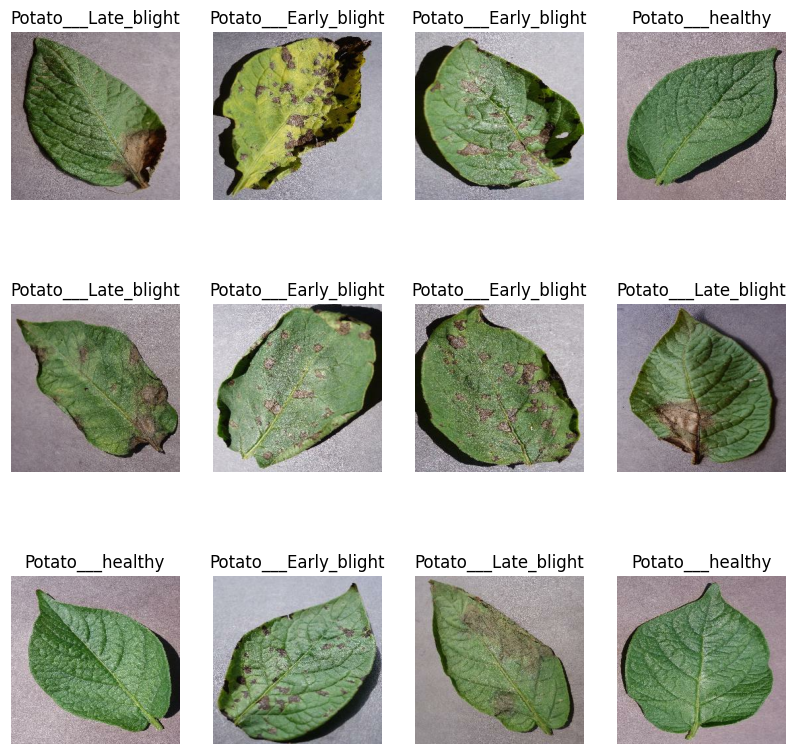

In [10]:
for image_batch,label_batch in data_potato.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Train Test Split

In [12]:
len(data_potato)

68

In [13]:
train_size = len(data_potato) *0.8
train_size

54.400000000000006

In [14]:
train_ds = data_potato.take(54)
len(train_ds)

54

In [15]:
val_size = len(data_potato) * 0.1
val_size

6.800000000000001

In [16]:
val_ds = data_potato.skip(54).take(6)
len(val_ds)

6

In [17]:
test_ds = data_potato.skip(54).skip(6)
len(test_ds)

8

In [18]:
def train_test_data(ds,train_split =0.8,val_split=0.1,test_split=0.1,shuffle =True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed=12)
    train_ds = data_potato.take(int(ds_size*train_split))
    val_ds = data_potato.skip(int(ds_size*train_split)).take(int(ds_size*val_split))
    test_ds = data_potato.skip(int(ds_size*test_split)).skip(int(ds_size*val_split))
    return train_ds,val_ds,test_ds

In [19]:
train_data,val_data,test_data =train_test_data(data_potato)

In [20]:
for image_i,label_i in train_data:
    print(image_i.numpy()[0])
    print(label_i.numpy()[0])


[[[124. 113. 117.]
  [166. 155. 159.]
  [133. 122. 126.]
  ...
  [161. 152. 155.]
  [159. 150. 153.]
  [155. 146. 149.]]

 [[137. 126. 130.]
  [141. 130. 134.]
  [120. 109. 113.]
  ...
  [160. 151. 154.]
  [159. 150. 153.]
  [155. 146. 149.]]

 [[159. 148. 152.]
  [137. 126. 130.]
  [148. 137. 141.]
  ...
  [159. 150. 153.]
  [159. 150. 153.]
  [156. 147. 150.]]

 ...

 [[167. 162. 168.]
  [143. 138. 144.]
  [191. 186. 192.]
  ...
  [187. 182. 188.]
  [185. 180. 186.]
  [182. 177. 183.]]

 [[159. 154. 160.]
  [187. 182. 188.]
  [156. 151. 157.]
  ...
  [187. 182. 188.]
  [187. 182. 188.]
  [186. 181. 187.]]

 [[178. 173. 179.]
  [166. 161. 167.]
  [162. 157. 163.]
  ...
  [186. 181. 187.]
  [188. 183. 189.]
  [190. 185. 191.]]]
1
[[[194. 192. 205.]
  [191. 189. 202.]
  [187. 185. 198.]
  ...
  [184. 186. 198.]
  [180. 182. 194.]
  [181. 183. 195.]]

 [[186. 184. 197.]
  [184. 182. 195.]
  [182. 180. 193.]
  ...
  [191. 193. 205.]
  [191. 193. 205.]
  [195. 197. 209.]]

 [[180. 178. 191

# Prefetch and Cache

In [22]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# Data Augmentation

In [24]:
rescaling_and_resize = keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Resizing(256,256)
])

In [25]:
data_augmentation =keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    ])

# CNN Model

In [27]:
INPUT_SHAPE =(32,256,256,3)

In [28]:
model = models.Sequential([
    rescaling_and_resize,
    data_augmentation,
    layers.Conv2D(32,(3,3,),activation='relu',input_shape=(INPUT_SHAPE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
    ])
model.build(input_shape=INPUT_SHAPE)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics=['Accuracy'])

In [31]:
history = model.fit(
    train_data,
    epochs = 30,
    batch_size =32,
    verbose=1,
    validation_data = val_data)
    
          

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - Accuracy: 0.4811 - loss: 0.9283 - val_Accuracy: 0.6626 - val_loss: 0.7460
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - Accuracy: 0.7051 - loss: 0.6677 - val_Accuracy: 0.6204 - val_loss: 0.9568
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - Accuracy: 0.7697 - loss: 0.5217 - val_Accuracy: 0.8924 - val_loss: 0.2646
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - Accuracy: 0.8945 - loss: 0.2669 - val_Accuracy: 0.9167 - val_loss: 0.2253
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - Accuracy: 0.9280 - loss: 0.2217 - val_Accuracy: 0.8970 - val_loss: 0.2663
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - Accuracy: 0.9126 - loss: 0.2210 - val_Accuracy: 0.9311 - val_loss: 0.1832
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - Accuracy: 0.9203 - loss: 0.2180 - val_Accuracy: 0.9190 - val_loss: 0.2048
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - Accuracy: 0.9292 - loss: 0.1738 - val_Accuracy: 0.9375 - val_loss:

In [58]:
history.params()

TypeError: 'dict' object is not callable

In [60]:
scores = model.evaluate(test_data)

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - Accuracy: 0.9777 - loss: 0.0409


In [62]:
scores

[0.03819723427295685, 0.9820601940155029]

In [64]:
history

In [66]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 54}

In [68]:
history.history.keys()

dict_keys(['Accuracy', 'loss', 'val_Accuracy', 'val_loss'])

In [74]:
history.history['Accuracy']

[0.53125,
 0.7523148059844971,
 0.8217592835426331,
 0.8836805820465088,
 0.9247685074806213,
 0.9143518805503845,
 0.9224537014961243,
 0.9369212985038757,
 0.9340277910232544,
 0.9392361044883728,
 0.9467592835426331,
 0.9224537014961243,
 0.9461805820465088,
 0.9612268805503845,
 0.9664351940155029,
 0.9733796119689941,
 0.9577546119689941,
 0.9751157164573669,
 0.9739583134651184,
 0.9751157164573669,
 0.9768518805503845,
 0.9866898059844971,
 0.9704861044883728,
 0.9664351940155029,
 0.9866898059844971,
 0.9855324029922485,
 0.9791666865348816,
 0.9577546119689941,
 0.9866898059844971,
 0.984375]

In [76]:
history.history['loss']

[0.8909180760383606,
 0.5671252012252808,
 0.4098186492919922,
 0.28636908531188965,
 0.21135690808296204,
 0.2127094566822052,
 0.20515261590480804,
 0.16638149321079254,
 0.17465856671333313,
 0.16379769146442413,
 0.13265153765678406,
 0.21003448963165283,
 0.13712257146835327,
 0.10403575748205185,
 0.08423090726137161,
 0.08219491690397263,
 0.11033473908901215,
 0.06869546324014664,
 0.07298608869314194,
 0.0626421570777893,
 0.06285905838012695,
 0.041962411254644394,
 0.08327735215425491,
 0.09509997069835663,
 0.045694589614868164,
 0.04100026562809944,
 0.053519945591688156,
 0.11025689542293549,
 0.03771465644240379,
 0.042589325457811356]

In [80]:
history.history['val_Accuracy']

[0.6626157164573669,
 0.6203703880310059,
 0.8923611044883728,
 0.9166666865348816,
 0.8969907164573669,
 0.9311342835426331,
 0.9189814925193787,
 0.9375,
 0.9554398059844971,
 0.9085648059844971,
 0.9276620149612427,
 0.9149305820465088,
 0.9438657164573669,
 0.9363425970077515,
 0.9357638955116272,
 0.9172453880310059,
 0.9444444179534912,
 0.9334490895271301,
 0.9484953880310059,
 0.9704861044883728,
 0.9849537014961243,
 0.9369212985038757,
 0.8917824029922485,
 0.9525462985038757,
 0.9861111044883728,
 0.9629629850387573,
 0.9565972089767456,
 0.9513888955116272,
 0.9484953880310059,
 0.9820601940155029]

In [82]:
history.history['val_loss']

[0.7459664940834045,
 0.9568299055099487,
 0.26457610726356506,
 0.22528593242168427,
 0.2662961483001709,
 0.18322937190532684,
 0.20480568706989288,
 0.17614738643169403,
 0.10868939012289047,
 0.2643626034259796,
 0.1905534863471985,
 0.2059192806482315,
 0.13585986196994781,
 0.1702175885438919,
 0.17960935831069946,
 0.22741538286209106,
 0.13810741901397705,
 0.18013952672481537,
 0.1325853317975998,
 0.07933466881513596,
 0.04471788555383682,
 0.18352478742599487,
 0.3315500020980835,
 0.1257169395685196,
 0.03828255832195282,
 0.09250911325216293,
 0.10099059343338013,
 0.12054838985204697,
 0.13933199644088745,
 0.03819723799824715]

In [92]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [96]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [125]:
for image_batch,label_batch in train_data.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[1].numpy()
    plt.axis('off')
    plt.imshow(first_image)
    print("Actual Image label:",class_names[first_label])
    batch_prediction= model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

Actual Image label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted label: Potato___Late_blight


In [143]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence =round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


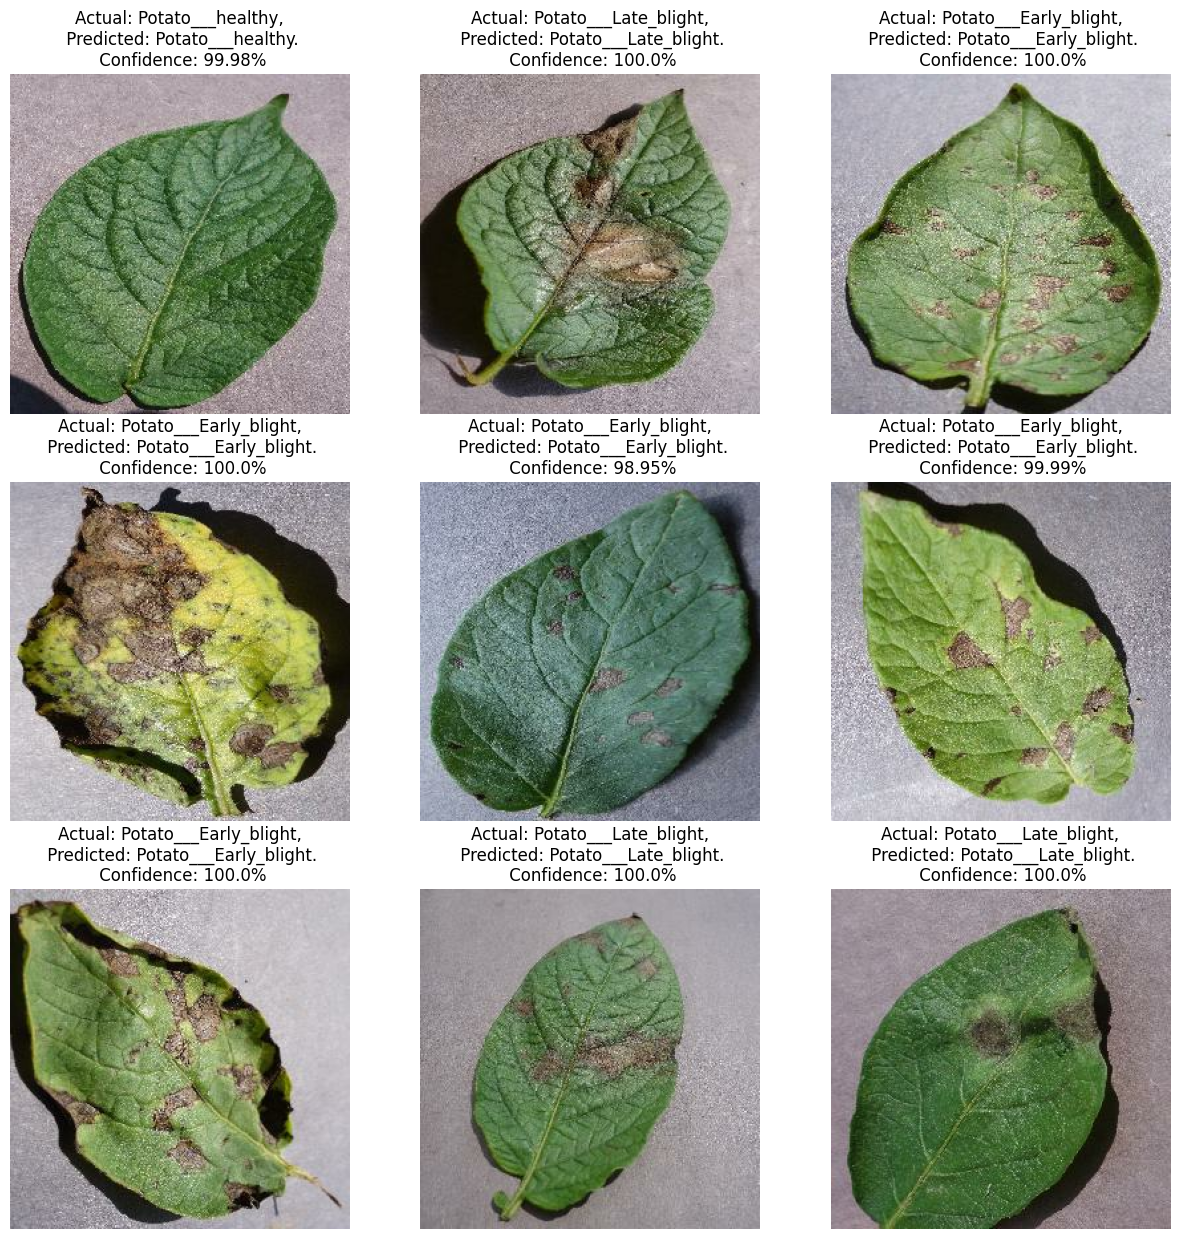

In [145]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [147]:
model_version = 1
model.save(f"../models/{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/1.

In [149]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/1.